# Определение перспективного тарифа для телеком-компании

В данной работе проведем предварительный анализ тарифов на небольшой выборке клиентов компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Известны активности абонентов тарифов «Смарт» и «Ультра»: количество сделанных звонков и израсходованных минут разговора, количество сообщений и объем использованного интернет-трафика за 2018 год.

**Цель данного исследования** : на основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и поиск оптимального тарифа

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка гипотез" data-toc-modified-id="Проверка гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий вывод" data-toc-modified-id="Общий вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li>

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

#устраним красные предупреждения
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import pyplot as plt

Изучим файл с данными о звонках абонента.

In [2]:
calls = pd.read_csv('datasets/calls.csv') 
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица calls (информация о звонках):

***id*** — уникальный номер звонка

***call_date*** — дата звонка

***duration*** — длительность звонка в минутах

***user_id*** — идентификатор пользователя, сделавшего звонок

Округлим данные в сторону увеличения в столбце с продолжительностью звонка, т.к. «Мегалайн» всегда округляет секунды до минут. Затем изменим для того же столбца тип данных на int, т.к. нам будет удобнее работать с целыми числами после округления.

In [4]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

Выделим месяц из столбца дата звонка, т.к. далее мы будем работать именно с таким отчетным периодом.

In [5]:
calls['call_date'] = pd.DatetimeIndex(calls['call_date']).month
calls.columns = ['id', 'month', 'duration', 'user_id']
calls.head()

,id,month,duration,user_id
0,1000_0,7,0,1000
1,1000_1,8,0,1000
2,1000_2,6,3,1000
3,1000_3,9,14,1000
4,1000_4,12,6,1000


Создадим сводную таблицу, сгруппировав данные по пользователю и месяцу.

In [6]:
calls_pivot = calls.pivot_table(index= ['user_id', 'month'], values= 'duration', 
                                aggfunc=['count', 'sum']).reset_index()
calls_pivot.columns = ['user_id', 'month', 'calls_number', 'duration']
calls_pivot.head()

,user_id,month,calls_number,duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


Изучим файл с данными об использовании интернета абонентами.

In [7]:
internet = pd.read_csv('datasets/internet.csv', index_col=0)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Таблица internet (информация об интернет-сессиях):

***id*** — уникальный номер сессии

***mb_used***— объём потраченного за сессию интернет-трафика (в мегабайтах)

***session_date*** — дата интернет-сессии

***user_id*** — идентификатор пользователя

В данной таблице тоже выделим месяц из даты интернет-сессии.

In [9]:
internet['session_date'] = pd.DatetimeIndex(internet['session_date']).month
internet.columns = ['id', 'mb_used', 'month', 'user_id']
internet.head()

,id,mb_used,month,user_id
0,1000_0,112.95,11,1000
1,1000_1,1052.81,9,1000
2,1000_2,1197.26,6,1000
3,1000_3,550.27,8,1000
4,1000_4,302.56,9,1000


Создадим сводную таблицу, сгруппировав данные по пользователю и месяцу.

In [10]:
internet_pivot = internet.pivot_table(index= ['user_id', 'month'], values= ['mb_used'], 
                                aggfunc=['sum']).reset_index() 
internet_pivot.columns = ['user_id', 'month', 'mb_used'] 
internet_pivot.head() 

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Округлим данные в сторону увеличения в столбце с объемом потраченного интернет-трафика, т.к. «Мегалайн» всегда округляет Мегабайты до Гигабайт. Затем изменим для того же столбца тип данных на int, т.к. нам будет удобнее работать с целыми числами после округления.

In [11]:
internet_pivot['mb_used'] = internet_pivot['mb_used'] / 1024
internet_pivot['mb_used'] = np.ceil(internet_pivot['mb_used']).astype('int')
internet_pivot.columns = ['user_id', 'month', 'gb_used']    
internet_pivot.head() 

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


Изучим файл с данными об отправке сообщений абонентами.

In [12]:
messages = pd.read_csv('datasets/messages.csv') 
messages.head() 

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица messages (информация о сообщениях):

***id*** — уникальный номер сообщения

***message_date*** — дата сообщения

***user_id*** — идентификатор пользователя, отправившего сообщение

В данной таблице тоже выделим месяц из даты сообщения.

In [14]:
messages['message_date'] = pd.DatetimeIndex(messages['message_date']).month
messages.columns = ['id', 'month', 'user_id']

Создадим сводную таблицу, сгруппировав данные по пользователю и месяцу.

In [15]:
messages_pivot = messages.pivot_table(index= ['user_id', 'month'], values= [ 'id'], 
                                aggfunc=['count']).reset_index()
messages_pivot.columns = ['user_id', 'month', 'messages']                              
messages_pivot.head()    

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Изучим файл с данными о тарифах компании «Мегалайн»

In [16]:
tariffs = pd.read_csv('datasets/tariffs.csv') 
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице представлены 2 тарифных плана: «Смарт» и «Ультра».

**Описание тарифов**

*Тариф «Смарт»*

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 3 рубля

сообщение: 3 рубля

1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета

минута разговора: 1 рубль

сообщение: 1 рубль

1 Гб интернет-трафика: 150 рублей

In [17]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица tariffs (информация о тарифах):

***tariff_name*** — название тарифа

***rub_monthly_fee*** — ежемесячная абонентская плата в рублях

***minutes_included*** — количество минут разговора в месяц, включённых в абонентскую плату

***messages_included*** — количество сообщений в месяц, включённых в абонентскую плату

***mb_per_month_included*** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

***rub_per_minute*** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

***rub_per_message*** — стоимость отправки сообщения сверх тарифного пакета

***rub_per_gb*** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Изучим информацию обо всех абонентах компании «Мегалайн»

In [18]:
users = pd.read_csv('datasets/users.csv') 
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Таблица users (информация о пользователях):

***user_id*** — уникальный идентификатор пользователя

***first_name*** — имя пользователя

***last_name*** — фамилия пользователя

***age*** — возраст пользователя (годы)

***reg_date*** — дата подключения тарифа (день, месяц, год)

***churn_date*** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

***city*** — город проживания пользователя

***tariff*** — название тарифного плана

Выберем характеристики абонентов, которые понадобятся нам в нашем исследовании

In [19]:
new_users = users.drop(columns = ['first_name', 'last_name', 'age', 'churn_date', 'reg_date'], axis = 1)
new_users.head()

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [20]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  500 non-null    int64 
 1   city     500 non-null    object
 2   tariff   500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


Объединим в общую таблицу таблицы с активностями абонентов: звонки, смс и интернет с таблицей, содержащей информацию о самих абонентах.

In [21]:
calls_messages= calls_pivot.merge(
    messages_pivot, on=['user_id', 'month'], how='outer'
    )
calls_messages.reset_index()
calls_messages_internet =calls_messages.merge(
    internet_pivot, on=['user_id', 'month'], how='outer'
    )
calls_messages_internet.reset_index()
calls_messages_internet.columns = ['user_id', 'month', 'calls_total', 'calls_duration_total', 'messages_total', 'gb_used']
calls_messages_internet.head()

,user_id,month,calls_total,calls_duration_total,messages_total,gb_used
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0


In [22]:
df = new_users.merge(calls_messages_internet, on=['user_id'], how='left')
df.reset_index()
df.head()

,user_id,city,tariff,month,calls_total,calls_duration_total,messages_total,gb_used
0,1000,Краснодар,ultra,5.0,22.0,159.0,22.0,3.0
1,1000,Краснодар,ultra,6.0,43.0,172.0,60.0,23.0
2,1000,Краснодар,ultra,7.0,47.0,340.0,75.0,14.0
3,1000,Краснодар,ultra,8.0,52.0,408.0,81.0,14.0
4,1000,Краснодар,ultra,9.0,58.0,466.0,57.0,15.0


**Вывод**

Для проведения анализа тарифов в одну таблицу были собраны данные из исходных таблиц. Окончательная таблица содержит информацию об абонентах компании «Мегалайн» и всех их активностях: звонках, сообщениях и использовании интернета.

## Предобработка данных

Выведем общую информацию о единой таблице.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3216 non-null   int64  
 1   city                  3216 non-null   object 
 2   tariff                3216 non-null   object 
 3   month                 3214 non-null   float64
 4   calls_total           3174 non-null   float64
 5   calls_duration_total  3174 non-null   float64
 6   messages_total        2717 non-null   float64
 7   gb_used               3203 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 226.1+ KB


В полученной таблице имеются пропуски. Рассмотрим их и узнаем, можно ли их заполнить.

In [24]:
df.isna().sum()

user_id                   0
city                      0
tariff                    0
month                     2
calls_total              42
calls_duration_total     42
messages_total          499
gb_used                  13
dtype: int64

Пропуски в столбце с месяцами вероятно появились из-за технической ошибки. Поскольку их очень мало: менее 1%, удалим их из таблицы.

In [25]:
df.dropna(subset = ['month'], inplace =True)

В столбцах, содержащих информацию об активности абонента: звонки, смс и интернет, тоже есть пропуски. Проверим, не связаны ли они с тем, что мы не добавили каких-то абонентов в конечную таблицу

In [26]:
users[users['user_id'].isin(df['user_id'].unique()) == False]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


У нас действительно есть 2 пропущенных абонента. Проверим, есть ли у нас данные об их активностях: звонках, смс и интернете в соответствующих таблицах.

In [27]:
internet.query('user_id == 1128 or user_id ==1371')

,id,mb_used,month,user_id


In [28]:
messages.query('user_id == 1128 or user_id ==1371')

,id,month,user_id


In [29]:
calls.query('user_id == 1128 or user_id ==1371')

,id,month,duration,user_id


Сведений нет. Из этого можем сделать вывод, что абоненты не пользовались услугами связи. Также из данных таблицы об абонентах мы видим, что данные абоненты подключились к тарифу и отключились от него в одном месяце. В таком случае, отсутствие данных абонентов в конечной таблице не должно повлиять на результат нашего анализа.

Также были обнаружены пропуски в столбцах с активностями клиента: звонков, смс и использованного интернета.Можно объяснить это так: пользователь не пользовался услугой в данном месяце, поэтому не потратил минуты или смс, или интернет. Поэтому мы можем заполнить эти пропуски нулями.

In [30]:
list_columns = ['calls_duration_total','calls_total', 'messages_total', 'gb_used']
for column in list_columns:
    df[column] = df[column].fillna(0)

Проверим, все ли пропуски заполнены.

In [31]:
df.isna().sum()

user_id                 0
city                    0
tariff                  0
month                   0
calls_total             0
calls_duration_total    0
messages_total          0
gb_used                 0
dtype: int64

Готово. Теперь уточним, корректные ли типы данных в конечной таблице, или есть необходимость поменять типы данных для дальнейшего удобства.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3214 non-null   int64  
 1   city                  3214 non-null   object 
 2   tariff                3214 non-null   object 
 3   month                 3214 non-null   float64
 4   calls_total           3214 non-null   float64
 5   calls_duration_total  3214 non-null   float64
 6   messages_total        3214 non-null   float64
 7   gb_used               3214 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 226.0+ KB


В столбцах, содержащих информацию о месяце и активностях клиента, поменям тип данных на int, т.к. нам не нужны в них дробные числа.

In [33]:
list_columns = ['month', 'calls_duration_total', 'calls_total', 'messages_total', 'gb_used']
for column in list_columns:
    df[column] = df[column].astype('int')

**Вывод**

На этапе предобработки данных заменили пропущенные значения в данных, выявили возможные причины их пропуска. Менее 1 % значений мы удалили, т.к. нет возможности корректно их заменить. Их удаление не повлияет значительно на результаты исследования.

Кроме того, были обнаружены пропуски в столбцах с активностями клиента: звонков, смс и использованного интернета. Объяснили это так: пользователь не пользовался услугой в данном месяце, поэтому не потратил минуты или смс, или интернет. Поэтому эти пропуски заполнили нулями.

Также мы поменяли типы данных для дальнейшего удобства работы с ними.

## Расчёты и добавление результатов в таблицу

Для анализа тарифов нам понадобится информация об абонентах компании, а именно:

*   количество сделанных звонков и израсходованных минут разговора по месяцам;
*   количество отправленных сообщений по месяцам;
*   объем израсходованного интернет-трафика по месяцам;
*   помесячная выручка с каждого абонента.

Первые 3 параметра мы уже рассчитали ранее, когда объединяли таблицы.
На данном этапе рассчитаем помесячную выручку с каждого абонента.


In [34]:
# Напишем функцию для расчета помесячной выручки с каждого абонента и добавления нового столбца

def revenue(row):
    if row['tariff'] == 'smart':
        price_calls = (row['calls_total'] - tariffs.loc[0,'minutes_included']) * tariffs.loc[0,'rub_per_minute']
        if price_calls < 0: price_calls = 0
        price_message = (row['messages_total'] - tariffs.loc[0,'messages_included']) * tariffs.loc[0,'rub_per_message']
        if price_message < 0: price_message = 0
        price_internet  = (row['gb_used'] - tariffs.loc[0,'mb_per_month_included']/1024) * tariffs.loc[0,'rub_per_gb'] 
        if price_internet < 0: price_internet = 0
        revenue = price_calls + price_message  + price_internet + tariffs.loc[0,'rub_monthly_fee']

    elif row ['tariff'] == 'ultra':
        price_calls = (row['calls_total'] - tariffs.loc[1,'minutes_included']) * tariffs.loc[1,'rub_per_minute']
        if price_calls < 0: price_calls = 0
        price_message = (row['messages_total'] - tariffs.loc[1,'messages_included']) * tariffs.loc[1,'rub_per_message']
        if price_message < 0: price_message = 0
        price_internet = (row['gb_used'] - tariffs.loc[1,'mb_per_month_included']/1024) * tariffs.loc[1,'rub_per_gb'] 
        if price_internet < 0: price_internet = 0
        revenue = price_calls + price_message + price_internet + tariffs.loc[1,'rub_monthly_fee']
    
    return revenue

df['revenue'] = df.apply(revenue, axis=1)

In [35]:
df.head()

,user_id,city,tariff,month,calls_total,calls_duration_total,messages_total,gb_used,revenue
0,1000,Краснодар,ultra,5,22,159,22,3,1950.0
1,1000,Краснодар,ultra,6,43,172,60,23,1950.0
2,1000,Краснодар,ultra,7,47,340,75,14,1950.0
3,1000,Краснодар,ultra,8,52,408,81,14,1950.0
4,1000,Краснодар,ultra,9,58,466,57,15,1950.0


**Вывод**

На данном этапе были рассчитаны параметры, которые необходимы нам для анализа об активности абонентов компании.

## Исследовательский анализ данных

На основе имеющихся данных проведем анализ поведения клиентов оператора "Мегалайн". Выясним, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

Рассчитаем среднее количество минут, сообщений и интернет-трафика, дисперсию и стандартное отклонение для каждого тарифа.

In [36]:
df.pivot_table(index= 'tariff', values= 'calls_duration_total', aggfunc= ['mean', 'var','std'])

,mean,var,std
,calls_duration_total,calls_duration_total,calls_duration_total
tariff,,,
smart,417.934948,36219.315784,190.313730
ultra,526.623350,100873.633397,317.606098


In [37]:
df.pivot_table(index= 'tariff', values= 'messages_total', aggfunc= ['mean', 'var','std'])

,mean,var,std
,messages_total,messages_total,messages_total
tariff,,,
smart,33.384029,796.812958,28.227876
ultra,49.363452,2285.266143,47.804457


In [38]:
df.pivot_table(index= 'tariff', values= 'gb_used', aggfunc= ['mean', 'var','std'])

,mean,var,std
,gb_used,gb_used,gb_used
tariff,,,
smart,16.328847,33.028705,5.747061
ultra,19.494416,97.091686,9.853511


In [39]:
mean_smart = df.query('tariff == "smart"').groupby(['user_id']).agg(['mean'])
mean_smart.columns = ['month', 'mean_calls_total', 'mean_calls_duration_total', 'mean_messages_total', 'mean_gb_used', 'mean_revenue']
mean_smart.head()

,month,mean_calls_total,mean_calls_duration_total,mean_messages_total,mean_gb_used,mean_revenue
user_id,,,,,,
1001,11.5,61.0,422.000000,0.0,16.000000,850.000000
1002,9.0,31.0,216.714286,10.0,16.714286,1035.714286
1005,6.5,74.0,550.416667,46.0,8.583333,558.250000
1006,7.0,46.0,318.272727,0.0,15.090909,931.818182
1007,8.0,68.0,486.555556,25.0,14.888889,794.444444


In [40]:
mean_ultra = df.query('tariff == "ultra"').groupby(['user_id']).agg(['mean'])
mean_ultra.columns = ['month', 'mean_calls_total', 'mean_calls_duration_total', 'mean_messages_total', 'mean_gb_used', 'mean_revenue']
mean_ultra.head()

,month,mean_calls_total,mean_calls_duration_total,mean_messages_total,mean_gb_used,mean_revenue
user_id,,,,,,
1000,8.5,46.0,320.750,62.0,13.625,1950.0
1003,10.0,104.0,764.400,76.0,11.800,1950.0
1004,8.5,22.0,123.375,149.0,18.750,1950.0
1013,11.5,71.0,468.000,21.0,15.500,1950.0
1016,11.5,10.0,61.000,71.0,13.500,1950.0


Сравним среднюю длительность звонков для каждого тарифа.

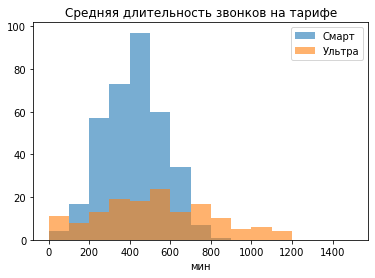

In [41]:
smart_mean_calls_duration_total = mean_smart['mean_calls_duration_total']
ultra_mean_calls_duration_total = mean_ultra['mean_calls_duration_total']

plt.hist(smart_mean_calls_duration_total, bins = 15, range=(0,1500), label= 'Смарт', alpha = 0.6)
plt.hist(ultra_mean_calls_duration_total, bins = 15, range=(0,1500), label= 'Ультра', alpha = 0.6)

plt.xlabel('мин')
plt.title('Средняя длительность звонков на тарифе')
plt.legend(loc='upper right')
plt.show()


Абоненты, которые пользуются тарифом "Смарт", в среднем ежемесячно разговаривают от 300 до 600 минут, а те, кто пользуется тарифом "Ультра" - от 300 до 800 минут. Причем для абонентов тарифа "Ультра" характерен большой разброс данных, т.е. среди них есть много людей, которые вообще не звонят, и тех, кто разговаривает и более 800 минут. 

Но стоит заметить, что для абонентов тарифа "Ультра" высокий лимит минут разговора, входящий в пакет - 3000 минут, а среди имеющихся данных максимальная продолжительность разговоров в месяц - 1673. Значит, абоненты тарифа "Ультра" не оплачивают минуты сверх тарифного пакета в отличие от абонентов тарифа "Смарта", среди которых есть те, чья дительность звонков превышает тарифный лимит -  500 минут.

Показатель стандартного отклонения для абонентов тарифа "Ультра" больше, чем для абонентов тарифа "Смарт", что также подтверждает большой разброс данных о средней длительности звонков в месяц. 

Сравним, сколько сообщений отправляют пользователи в месяц, для каждого тарифа.

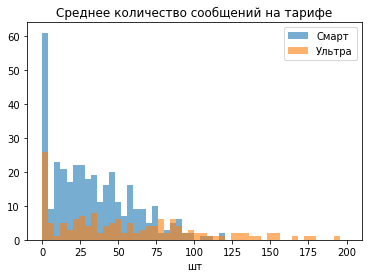

In [42]:
smart_mean_messages_total = mean_smart['mean_messages_total']
ultra_mean_messages_total = mean_ultra['mean_messages_total']

plt.hist(smart_mean_messages_total, bins=50, range=(0,200), label= 'Смарт', alpha = 0.6)
plt.hist(ultra_mean_messages_total, bins=50, range=(0,200), label= 'Ультра', alpha = 0.6)

plt.xlabel('шт')
plt.title('Среднее количество сообщений на тарифе')
plt.legend(loc='upper right')
plt.show()


Абоненты, которые пользуются тарифом "Смарт", в среднем отправляют от 10 до 40 сообщений ежемесячно, что даже не превышает количество сообщений в тарифный пакет.

Абоненты, которые пользуются тарифом "Ультра" отправляют в среднем от 15 до 100 сообщений, что гораздо меньше количества сообщений, входящих в их тарифный пакет - 1000. 

Нужно учесть, что в настоящее время люди стали гораздо меньше отправлять сообщений, поэтому не будем уделять много внимания этой опции при выборе перспективного тарифа для компании.

Сравним, сколько тратят интернет-трафика абоненты каждого тарифа.

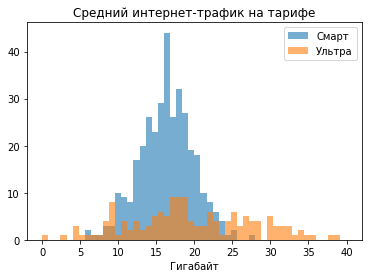

In [43]:
smart_mean_gb_used = mean_smart['mean_gb_used']
ultra_mean_gb_used = mean_ultra['mean_gb_used']

plt.hist(smart_mean_gb_used, bins=50, range=(0,40), label= 'Смарт', alpha = 0.6)
plt.hist(ultra_mean_gb_used, bins=50, range=(0,40), label= 'Ультра', alpha = 0.6)

plt.xlabel('Гигабайт')
plt.title('Средний интернет-трафик на тарифе')
plt.legend(loc='upper right')
plt.show()


Абоненты тарифа "Смарт" в среднем тратят от 15 до 20 Гб интернет-трафика, что равно или немного превышает лимит тарифа. Значит, в основном пользователи оплачивают интернет-трафик дополнительно лишь несколько дополнительных Гб.

Абоненты, которые пользуются тарифом "Ультра", в среднем тратят от 15 до 30 Гб интернет-трафика. Этот интернет-трафик входит в лимит их тарифного плата. Причем для абонентов тарифа "Ультра" характерен большой разброс данных, о чем свидетельствует и показатель стандартного отклонения: для абонентов тарифа "Ультра" он больше, чем для абонентов тарифа "Смарт". Это значит, что среди абонентов тарифа "Ультра" много людей, которые используют как меньше, так и значительно больше среднего значения интернет-трафика.

**Вывод**

Анализ активностей абонентов двух тарифов: "Ультра" и "Смарт" показал, что:

1. Для абонентов тарифа "Ультра" характерен большой разброс данных, т.е. среди них есть много людей, которые вообще не звонят, и тех, кто разговаривает и гораздо больше остальных пользователей, а также тех, кто вообще не отправляет сообщения или использует интернет-трафика меньше других пользователей либо наоборот отправляет сообщений гораздо больше, чем другие абоненты, и тратят много интернет-трафика.


2. Для абонентов тарифа "Ультра" установлен высокий лимит минут звонков, входящий в их пакет - 3000 минут, а было выяснено, что среди имеющихся данных максимальная продолжительность разговоров в месяц - 1673. Значит, абоненты тарифа "Ультра" не оплачивают минуты сверх тарифного пакета в отличие от пользователей тарифа "Смарта", среди которых есть и те, чья длительность звонков превышает тарифный лимит -  500 минут.


3. Абоненты, которые пользуются тарифом "Смарт", как и те, которые пользуются тарифом "Ультра" отправляют сообщений гораздо меньше лимита, входящего в их тарифный пакет, а значит не платят сверх лимита. Это связано с тем, что люди стали редко отправлять сообщения.


3. Абоненты тарифа "Смарт" в среднем тратят от 15 до 20 Гб интернет-трафика, что равно или немного превышает лимит тарифа (15 Гб). Значит, в основном пользователи оплачивают дополнительно лишь несколько дополнительных Гб интернет-трафика. Абоненты, которые пользуются тарифом "Ультра", в среднем тратят от 15 до 30 Гб интернет-трафика, что не превышает лимит их тарифа, но всё же среди абонентов тарифа "Ультра" много пользователей, которые оплачивают израсходованные Гигабайты сверх своего тарифного пакета.

## Проверка гипотез

Сначала проведем анализ среднемесячной выручки с каждого абонента. Для этого рассчитаем числовые характеристики выборки и построим графики.

In [44]:
smart_df = df[df['tariff'] == "smart"]
smart_df['revenue'].describe()

count    2229.000000
mean     1165.156572
std       740.556759
min       550.000000
25%       550.000000
50%       950.000000
75%      1550.000000
max      5249.000000
Name: revenue, dtype: float64

In [45]:
ultra_df = df[df['tariff'] == "ultra"]
ultra_df['revenue'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

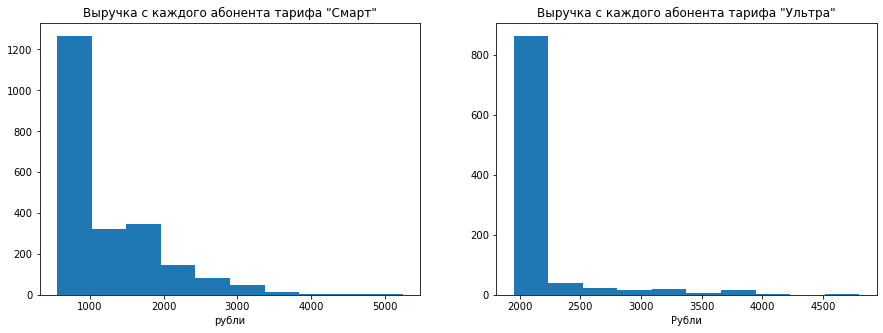

In [46]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(smart_df['revenue'], bins=10)
ax1.set(
       title = 'Выручка с каждого абонента тарифа "Смарт"',
       xlabel = 'рубли',
)
ax2.hist(ultra_df['revenue'], bins=10)
ax2.set(
       title = 'Выручка с каждого абонента тарифа "Ультра"',
       xlabel = 'Рубли',
)
plt.show()

На графиках заметно выделяется, что большинство абонентов тарифа "Ультра" оплачивают только абонентскую плату согласно их тарифного пакета - 1950 руб.
Абоненты тарифа "Смарт" тоже в основном платят только абонентскую плату в соответствии с тарифом - 550 руб., но среди них много и тех, кто платит значительно больше.
К тому же стоит отметить, что максимальная выручка с одного пользователя тарифа "Смарт" превышает максимальную выручку с одного пользователя тарифа "Ультра". *Таким образом, если привлекать клиентов пользоваться тарифом "Смарт", привлечём клиентов, которые будут платить больше.*



<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Cредняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая.}\\
   H_1 :\text{Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [47]:
results = st.ttest_ind(ultra_df['revenue'], smart_df['revenue'], equal_var=False)

alpha=0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0
Отвергаем нулевую гипотезу


Вывод: p-value получилось меньше выбранного уровня  α=0.05 . На основе имеющихся данных на уровне значимости 5% есть основания отвергнуть нулевую гипотезу. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [48]:
moscow_df = df[df['city'] == "Москва"]

In [49]:
other_region_df = df[df['city'] != "Москва"]

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов одинаковая.}\\
   H_1 :\text{Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [50]:
results = st.ttest_ind(moscow_df['revenue'], other_region_df['revenue'], equal_var=False)

alpha=0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.2843727016644021
Не получилось отвергнуть нулевую гипотезу


Вывод: p-value получилось меньше выбранного уровня  α=0.05. На основе имеющихся данных на уровне значимости 5% нет основания отвергнуть нулевую гипотезу. Таким образом, средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов одинаковая.

**Вывод**

В рамках исследования было выявлено, что:
большинство абонентов тарифа "Ультра" оплачивают только абонентскую плату согласно их тарифного пакета - 1950 руб. Абоненты тарифа "Смарт" тоже в основном платят только абонентскую плату в соответствии с тарифом - 550 руб., но среди них много и тех, кто платит значительно больше.

К тому же стоит отметить, что максимальная выручка с одного пользователя тарифа "Смарт" превышает максимальную выручку с одного пользователя тарифа "Ультра". Таким образом, если привлекать клиентов пользоваться тарифом "Смарт", привлечём клиентов, которые будут платить больше.

С помощью ttest из библиотеки scipy были проведены проверки гипотез:
1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая.
2. Средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов одинаковая.
Проверка показала, что:
1. На основе имеющихся данных на уровне значимости 5% есть основания отвергнуть нулевую гипотезу. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
2. На основе имеющихся данных на уровне значимости 5% нет основания отвергнуть нулевую гипотезу. Таким образом, Средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов одинаковая.

## Общий вывод

В проектной работе был проведен предварительный анализ тарифов на небольшой выборке клиентов компании «Мегалайн» — федерального оператора сотовой связи. 
В предоставленных данных были выявлены пропущенные значения, которые были заменены, где это возможно.

Далее были исследованы активности абонентов тарифов «Смарт» и «Ультра»: звонки, сообщения и интернет-трафик. В результате узнали, что:

1. Для абонентов тарифа "Ультра" высокий лимит минут разговора, входящий в пакет - 3000 минут, а среди имеющихся данных максимальная продолжительность разговоров в месяц - 1673. Значит, абоненты тарифа "Ультра" не оплачивают минуты сверх тарифного пакета в отличие от пользователей тарифа "Смарта", среди которых есть те, чья длительность звонков превышает тарифный лимит -  500 минут.
2. Абоненты тарифа "Смарт" в среднем тратят от 15 до 20 Гб интернет-трафика, что равно или немного превышает лимит тарифа (15 Гб). Значит, в основном пользователи оплачивают дополнительно лишь несколько дополнительных Гб интернет-трафика. Абоненты, которые пользуются тарифом "Ультра", в среднем тратят от 15 до 30 Гб интернет-трафика, что не превышает лимит их тарифа, но всё же среди абонентов тарифа "Ультра" много пользователей, которые оплачивают израсходованные Гигабайты сверх своего тарифного пакета.

На следующем этапе мы сравнили помесячную выручку с каждого пользователя тарифа "Смарт" и "Ультра" и выяснили, что:
большинство абонентов тарифа "Ультра" оплачивают только абонентскую плату согласно их тарифного пакета - 1950 руб. Абоненты тарифа "Смарт" тоже в основном платят только абонентскую плату в соответствии с тарифом - 550 руб., но среди них много и тех, кто платит значительно больше.

К тому же стоит отметить, что максимальная выручка тарифа "Смарт" превышает максимальную выручку тарифа "Ультра". *Таким образом, если привлекать клиентов пользоваться тарифом "Смарт", привлечём клиентов, которые будут платить больше.*


Задачей дальнейших исследований может быть анализ активностей:звонков, сообщений и интернет-трафика отдельно для пользователей из Москвы и для других регионов, т.к. гипотеза о том, средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов одинаковая, не была отвергнута. 